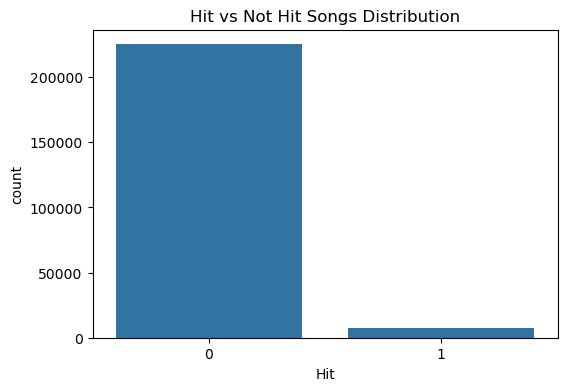

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('SpotifyFeatures.csv')
df['Hit']=df['popularity'].apply(lambda x: 1 if x >70 else 0)
plt.figure(figsize=(6,4))
sns.countplot(x='Hit', data=df)
plt.title('Hit vs Not Hit Songs Distribution')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features]
y = df['Hit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, stratify=y)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
    }

model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45033
           1       0.00      0.00      0.00      1512

    accuracy                           0.97     46545
   macro avg       0.48      0.50      0.49     46545
weighted avg       0.94      0.97      0.95     46545



c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     45033
           1       0.33      0.18      0.23      1512

    accuracy                           0.96     46545
   macro avg       0.65      0.58      0.61     46545
weighted avg       0.95      0.96      0.96     46545

Decision Tree Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     45033
           1       0.61      0.75      0.68      1512

    accuracy                           0.98     46545
   macro avg       0.80      0.87      0.83     46545
weighted avg       0.98      0.98      0.98     46545

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     45033
           1       0.96      0.75      0.84      1512

    accuracy                           0.99     46545
   macro avg       0.97      0.87      0.92     465

In [6]:
import pickle

# Save Random Forest Model
best_model = models['Random Forest']
with open('hit_classifier_rf.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
